In [4]:
import glob
import pandas as pd
import numpy as np
from datetime import datetime
from ggplot import *
%matplotlib inline

In [5]:
file_list = glob.glob('nypd-sqf-data/*.csv')
# columns = ['year', 'datestop', 'timestop', 'frisked', 'searched', 'contrabn', 'sex', 'race', 'age', 'xcoord', 'ycoord']
# columns = ['year', 'datestop']
columns = ['year', 'city', 'race', 'sector']

df = pd.DataFrame()
for file in file_list:
#     print("Loading into dataframe: ", file)
    frame = pd.read_csv(file, usecols=columns, na_values=' ', low_memory=False, nrows=2500)
    frame['total'] = len(frame)
    df = pd.concat([df, frame], ignore_index=True)



In [7]:
df.sample(25)

,city,race,sector,total,year
14760,MANHATTAN,B,E,2500,2008
142,NaN,B,NaN,2500,2003
22222,BRONX,B,A,2500,2011
19212,QUEENS,Q,F,2500,2010
17361,QUEENS,B,D,2500,2009
23401,BROOKLYN,B,D,2500,2012
11236,QUEENS,W,I,2500,2007
5665,QUEENS,B,NaN,2500,2005
1993,NaN,Q,NaN,2500,2003
14463,QUEENS,B,I,2500,2008


In [10]:
cities = df.loc[(df.race == 'B') | (df.race == 'P') | (df.race == 'Q') | (df.race == 'W')].copy()
cities = cities.dropna()
cities.city = cities.city.map(lambda x: x.lower().split()[0])

In [12]:
cities.head()

,year,race,city,total
25006,2004,B,brooklyn,25000
25027,2004,B,brooklyn,25000
25028,2004,B,brooklyn,25000
25029,2004,B,brooklyn,25000
25030,2004,B,brooklyn,25000


In [23]:
tmp = cities.groupby(['year', 'city', 'race']).count()

In [27]:
tmp = tmp.reset_index()

In [33]:
for year in tmp.year.unique():
    tmp.loc[(tmp.year == year), 'total_y'] = tmp.loc[(tmp.year == year), 'total'].sum()

In [36]:
tmp['prop'] = tmp['total']/tmp['total_y']

In [37]:
tmp.head()

,year,city,race,total,total_y,prop
0,2004,brooklyn,B,1169,1622,0.720715
1,2004,brooklyn,P,74,1622,0.045623
2,2004,brooklyn,Q,323,1622,0.199137
3,2004,brooklyn,W,56,1622,0.034525
4,2005,brooklyn,B,11713,22988,0.509527


In [43]:
tmp_b = tmp.loc[(tmp.race == 'B')]

In [56]:
xx = tmp_b.groupby(['year'])['total'].sum().reset_index()

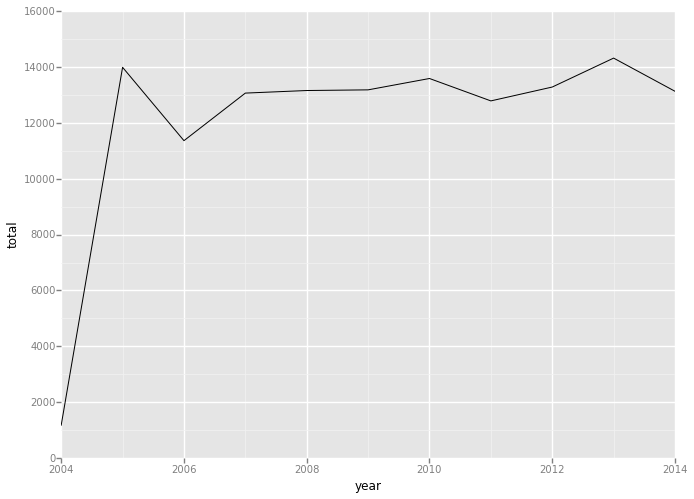

<ggplot: (286043070)>

In [59]:
ggplot(aes(x ='year', y='total'), xx) + geom_line()